In [66]:
IRdisplay::display_html(file='code_hiding.html')

Toggle ON/OFF 
code cells.

In [52]:
# load packages and define constants
library(data.table) # see https://cran.r-project.org/web/packages/data.table/vignettes/datatable-intro.html for reference
library(ggplot2)
source("R_functions.r")

# folder/file-specific constants
PILOT_NUMBER <- 6
DATA_FOLDER <- "~/programing/data/psychophys/"
FIRA_TAG <- "FIRA"
FRAMES_TAG <- "framesInfo"
DOTS_TAG <- "dotsPositions"

# key-specific constants 
TRIALS <- "trials"
FRAMES <- "frames"
DOTS <- "dots"

# plot-specific constants
AXES_LABEL_FONT <- 18
AXES_FONT <- 15

In [53]:
# load csv files into data.tables
tb <- list(
    loadPilotCSV(PILOT_NUMBER, DATA_FOLDER, FIRA_TAG),
    loadPilotCSV(PILOT_NUMBER, DATA_FOLDER, FRAMES_TAG),
    loadPilotCSV(PILOT_NUMBER, DATA_FOLDER, DOTS_TAG))
names(tb) <- c(TRIALS, FRAMES, DOTS)

# Notebook's goals

Make sure the workflow from running the task to analyzing the data works.


## Workflow description
1. Task is run with repo [SingleCP_DotsReversal_Task](https://github.com/TheGoldLab/SingleCP_DotsReversal_Task/) (appropriate branch must be chosen).
  1. A `.mat` data file is outputted
  2. I usually manually rename this file `pilot_#.mat` and upload it to PennBox (Data/Psychophysics/Radillo_SingleCP_DotsReversal/)
2. Data is analyzed with repo [SingleCP_DotsReversal_DataAnalaysis](https://github.com/aernesto/SingleCP_DotsReversal_DataAnalysis)(again, with the appropriate branch).
  1. The first step is to convert data from the .mat file into CSV format with [this script](https://github.com/aernesto/SingleCP_DotsReversal_DataAnalysis/blob/02109ab98b956f2aad4ac15f01e1d373260c8af0/MATLAB_scripts/mat2csv.m) 
    - `pilot#_framesInfo.csv` [Fields description](https://github.com/aernesto/SingleCP_DotsReversal_DataAnalysis/wiki/Fields-description-of-*framesInfo.csv-file).
    - `pilot#_FIRA.csv`  [Fields description](https://github.com/aernesto/SingleCP_DotsReversal_DataAnalysis/wiki/Fields-Description-of-*FIRA.csv-files).
    - `pilot#_dotsPositions.csv` [Fields description](https://github.com/aernesto/SingleCP_DotsReversal_DataAnalysis/wiki/Fields-descriptions-for-*dotsPositions.csv-file).

**TO-DO**
- Write detailed explanation of each column in each `.csv` file (i.e. update the [Wiki](https://github.com/aernesto/SingleCP_DotsReversal_DataAnalysis/wiki))
- Make sure data from the three `.csv` files is consistent

## Specific questions
1. How many frames are skipped on each trial, and where in the trial do they occur?
2. Does this number match the offset in viewing duration per trial?
3. Compute reverse kernels with the number of coherent dots as a proxy for motion energy

# Exploring the data
## The `*FIRA.csv` file (trials level)

In [54]:
str(tb[[TRIALS]])

Classes ‘data.table’ and 'data.frame':	18 obs. of  25 variables:
 $ taskID         : int  2 2 2 2 2 2 2 2 2 2 ...
 $ trialIndex     : int  6 9 12 14 1 15 4 17 11 10 ...
 $ trialStart     : num  805061 805066 805071 805076 805081 ...
 $ trialEnd       : num  805066 805071 805076 805081 805085 ...
 $ RT             : num  1.222 1.223 1.1 0.703 1.228 ...
 $ choice         : int  1 0 0 0 0 1 0 1 1 0 ...
 $ correct        : int  1 0 0 1 1 0 1 1 1 0 ...
 $ initDirection  : int  0 0 0 0 180 180 180 180 0 0 ...
 $ endDirection   : int  0 0 0 180 180 180 180 0 0 0 ...
 $ presenceCP     : int  0 0 0 1 0 0 0 1 0 0 ...
 $ coherence      : num  25.6 12.8 25.6 6.4 6.4 12.8 12.8 25.6 25.6 12.8 ...
 $ viewingDuration: num  0.1 0.2 0.2 0.3 0.1 0.3 0.1 0.3 0.2 0.2 ...
 $ probCP         : num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...
 $ timeCP         : num  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
 $ randSeedBase   : int  7597 9958 1108 5553 2607 9306 2457 859 8670 7918 ...
 $ fixationOn     : num

## The `*framesInfo.csv` file (frames level)

In [55]:
str(tb[[FRAMES]])

Classes ‘data.table’ and 'data.frame':	314 obs. of  6 variables:
 $ frameTotCount: int  3 4 5 6 7 8 9 10 11 12 ...
 $ onsetTime    : num  805062 805063 805064 805064 805064 ...
 $ onsetFrame   : int  215 290 345 351 352 353 508 600 624 625 ...
 $ swapTime     : num  805062 805063 805064 805064 805064 ...
 $ isTight      : int  0 0 0 0 1 1 0 0 0 1 ...
 $ trialIndex   : int  6 6 6 6 6 6 9 9 9 9 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [56]:
#tb[[FRAMES]][order(onsetFrame),.(minOnset=min(onsetFrame), maxOnset=max(onsetFrame), numUniqueOnset=.N), by=trialIndex]

## The `*dotsPositions.csv` file (dots level)

In [57]:
str(tb[[DOTS]])
#tb[[DOTS]][,.(.N),by=.(frameIdx,trialCount)]

Classes ‘data.table’ and 'data.frame':	43862 obs. of  6 variables:
 $ xpos      : num  0.7459 0.5048 0.8971 0.3443 0.0796 ...
 $ ypos      : num  0.2885 0.8416 0.5606 0.5963 0.0589 ...
 $ isActive  : int  1 0 0 1 0 0 1 0 0 1 ...
 $ isCoherent: int  1 0 0 1 0 0 1 0 0 1 ...
 $ frameIdx  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ trialCount: int  1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


# Checking that the three datasets are consistent
As we can see, the `frameIdx` field is common to `tb[[FRAMES]]` and `tb[[DOTS]]`, and the `trialIdx` is common to `tb[[DOTS]]` and `tb[[TRIALS]]`. Let's check whether these common fields match in terms of their unique values in each dataset.
## Exploring match between frames and dots levels

In [58]:
length(unique(tb[[FRAMES]][,frameTotCount]))

[1] 314

In [59]:
unique(tb[[DOTS]][,frameIdx])
length(unique(tb[[DOTS]][,frameIdx]))

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21

[1] 21

## Exploring match between `DOTS` and `TRIALS` levels

In [60]:
unique(tb[[DOTS]][,trialCount])

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18

In [61]:
unique(tb[[TRIALS]][,trialIndex])
length(unique(tb[[TRIALS]][,trialIndex]))
min(unique(tb[[TRIALS]][,trialIndex]))
max(unique(tb[[TRIALS]][,trialIndex]))

[1]  6  9 12 14  1 15  4 17 11 10  3  5 13  8 18  2  7 16

[1] 18

[1] 1

[1] 18

## Exploring match between `FRAMES` and `TRIALS` levels
### Frame count
- does the number of frames assigned to each trial match the frame count of each trial (match col)?

In [62]:
setkey(tb[[FRAMES]], trialIndex)
setkey(tb[[TRIALS]], trialIndex)

# Full OUTER JOIN (see https://rstudio-pubs-static.s3.amazonaws.com/52230_5ae0d25125b544caab32f75f0360e775.html)
frameCount <- merge(
    tb[[FRAMES]][order(trialIndex),.(numInFRAMES=.N),by=trialIndex],
    tb[[TRIALS]][order(trialIndex),.(numInTRIALS=numFrames),by=trialIndex],
    all=TRUE)
frameCount[,.(trialIndex, numInFRAMES, numInTRIALS, match=numInFRAMES == numInTRIALS)]

trialIndex,numInFRAMES,numInTRIALS,match
1,11,11,TRUE
2,11,11,TRUE
3,11,11,TRUE
4,11,11,TRUE
5,12,12,TRUE
6,6,6,TRUE
7,18,18,TRUE
8,19,19,TRUE
9,17,17,TRUE
10,17,17,TRUE


Any non-match in the right-most column above signals an *issue*.

### Timing of trial vs. timing of frames
- what time gaps do I observe between trial start and 1st frame start, and last frame end and trial end?

In [63]:
# get times of first and last frame in each trial
extremeFrameTimes <- tb[[FRAMES]][,.(firstFrame=min(swapTime), lastFrame=max(swapTime)),by=trialIndex]

# add start and end times of each trial
setkey(extremeFrameTimes, trialIndex)
timeMatchFramesTrials <- merge(extremeFrameTimes,
                   tb[[TRIALS]][,.(trialStart, trialEnd), by=trialIndex],
                   all=TRUE)
str(timeMatchFramesTrials)

Classes ‘data.table’ and 'data.frame':	18 obs. of  5 variables:
 $ trialIndex: int  1 2 3 4 5 6 7 8 9 10 ...
 $ firstFrame: num  805081 805137 805111 805090 805117 ...
 $ lastFrame : num  805083 805139 805115 805093 805119 ...
 $ trialStart: num  805081 805137 805111 805090 805117 ...
 $ trialEnd  : num  805085 805141 805117 805096 805122 ...
 - attr(*, "sorted")= chr "trialIndex"
 - attr(*, ".internal.selfref")=<externalptr> 


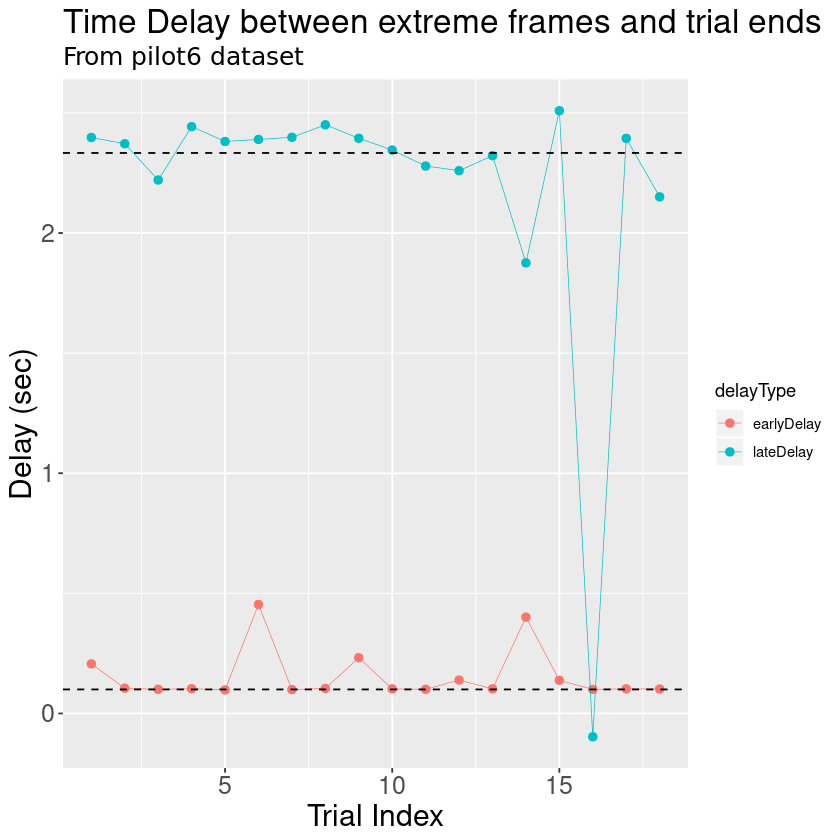

In [64]:
# transform to long format for ggplot 
longTimeData <- melt(timeMatchFramesTrials[,
                                           .(trialIndex, 
                                             earlyDelay=firstFrame - trialStart, 
                                             lateDelay=trialEnd - lastFrame)], 
                    id.vars=c("trialIndex"),
                    measure.vars=c("earlyDelay", "lateDelay"),
                    variable.name="delayType", value.name="delay")
#str(longTimeData)

frameRate <- 60 # rounded estimate obtained from dotsTheScreen.windowFrameRate
frameDuration <- (1 / frameRate) # in msec
frameDurations <- c(6*frameDuration, 140*frameDuration)

# plot
ggplot(longTimeData, aes(x=trialIndex, y=delay)) + geom_point(aes(col=delayType), size=2) +
    geom_line(aes(col=delayType),size=.2) +
    geom_hline(yintercept = frameDurations, linetype="dashed") +
    labs(title="Time Delay between extreme frames and trial ends",
         subtitle=paste("From pilot",PILOT_NUMBER," dataset",sep=""),
         y="Delay (sec)",
         x="Trial Index") + theme(plot.title=element_text(size=20,
                                    lineheight=1.2),  # title
            plot.subtitle=element_text(size=15,
                                       family="American Typewriter"),  # subtitle
            plot.caption=element_text(size=15),  # caption
            axis.title.x=element_text(size=AXES_LABEL_FONT),  # X axis title
            axis.title.y=element_text(size=AXES_LABEL_FONT),  # Y axis title
            axis.text.x=element_text(size=AXES_FONT),  # X axis text
            axis.text.y=element_text(size=AXES_FONT))  # Y axis text

In [65]:
tb[[TRIALS]][, .(length=trialEnd - trialStart)]

length
4.450262
4.288149
5.577368
5.585077
4.777962
5.185887
4.627903
4.712627
4.807637
5.084184
